In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = 'complete_renewable_energy_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [4]:
# Check for missing values
df.isnull().sum()

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)


### Correlation Analysis

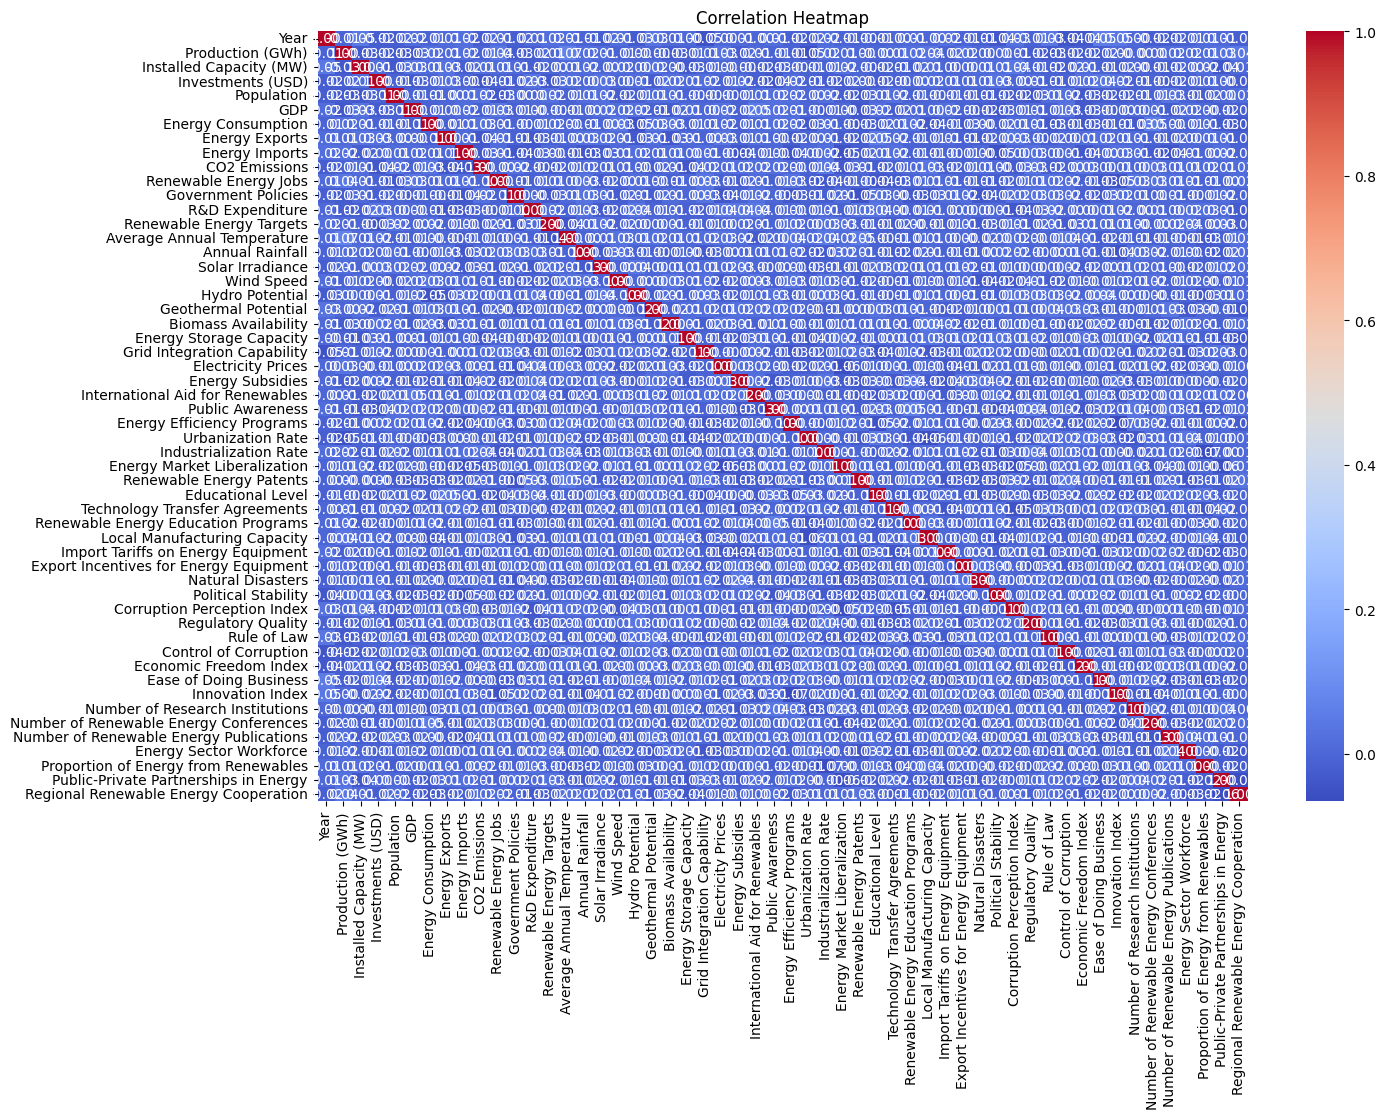

In [6]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Predicting Renewable Energy Production

In [8]:
# Define the target variable and features
X = numeric_df.drop(columns=['Production (GWh)'])
y = numeric_df['Production (GWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(815168700.8780965, -0.004284995596055774)

Confusion Matrix:
 [[128 103]
 [163 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.55      0.49       231
           1       0.51      0.39      0.44       269

    accuracy                           0.47       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.48      0.47      0.47       500


Accuracy Score: 0.468

Cross-Validation Accuracy Scores: [0.49  0.486 0.476 0.48  0.464]
Mean Cross-Validation Accuracy: 0.47919999999999996


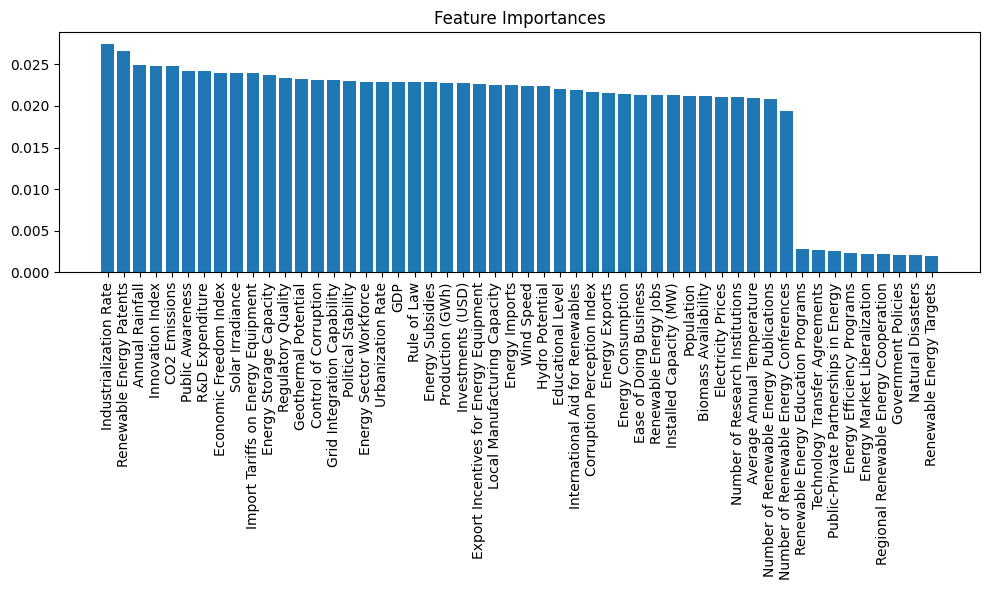

Prediction for the new data point: Yes


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('complete_renewable_energy_dataset.csv')

# Step 1: Data Preparation

# Define the target variable
# Assuming you want to classify based on the proportion of energy from renewables
# Set a threshold, e.g., >50% renewable energy means "Yes", otherwise "No"
df['Target'] = np.where(df['Proportion of Energy from Renewables'] > 50, 1, 0)

# Drop columns not needed for prediction
columns_to_drop = ['Country', 'Year', 'Energy Type', 'Proportion of Energy from Renewables']
df = df.drop(columns=columns_to_drop)

# Encode categorical features if any (example provided assuming you have categorical data)
# Assuming 'Government Policies' and 'Public-Private Partnerships in Energy' are categorical
le = LabelEncoder()
df['Government Policies'] = le.fit_transform(df['Government Policies'])
df['Public-Private Partnerships in Energy'] = le.fit_transform(df['Public-Private Partnerships in Energy'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = df.drop(columns=['Target']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 2: Split the Data
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Building
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Step 5: Making Predictions (example for a new data point)
# Example: Assuming you have a new data point (it should have the same format as X)
new_data = X_test.iloc[0:1]  # Replace with actual new data
prediction = rf_model.predict(new_data)
print(f"Prediction for the new data point: {'Yes' if prediction[0] == 1 else 'No'}")
